# KNN-Neighbor: Using Gene Dataset for Cancer Predictions

In [39]:
import math 
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix

In [3]:
x = pd.read_csv('gene_expression.csv')

In [4]:
x.head()

,Gene One,Gene Two,Cancer
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [5]:
x.shape

(3000, 3)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gene One  3000 non-null   float64
 1   Gene Two  3000 non-null   float64
 2   Cancer    3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


# 1

In [7]:
# Training Dataset for X & y value 

X = x.drop('Cancer', axis=1)

y = x.Cancer 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=7)



The dataset x is split into features (X) and the target variable (y). The features X are obtained by dropping the Cancer column from the dataset, while the target variable y is assigned the Cancer column, which contains the labels to be predicted.

The dataset is then split into training and testing subsets using the train_test_split function, with 80% of the data allocated for training the model and 20% reserved for testing its performance. The parameter random_state=42 ensures reproducibility of the split.

Finally, a k-Nearest Neighbors (k-NN) classifier is initialized with n_neighbors=7, meaning the model will classify a new data point based on the majority class of its 7 nearest neighbors in the feature space. This sets the stage for training the k-NN model and using it to predict the target variable.

In [32]:
# Using the Grid Search CV for Accuracy 

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets for Knn-modeling 
knn.fit(X_train, y_train)

# Calculate the accuracy of the model
print("Knn-nearest is: ",knn.score(X_test, y_test))

# Here X_test, y_test are the test data points
predictions = knn.predict(X_test)

Knn-nearest is:  0.925


This code implements a K-Nearest Neighbors (KNN) classification model to predict whether a person has heart disease. First, an instance of the `KNeighborsClassifier` is created with the number of neighbors (`n_neighbors`) set to 3, meaning the model will classify each test data point based on the majority class among its three closest neighbors in the feature space. The model is then trained using the `fit` method, which takes the training data (`X_train` and `y_train`) as input to learn the relationships between the features and target variable.

After training, the model's accuracy is calculated using the `score` method, which evaluates the model's performance on the test dataset (`X_test` and `y_test`). This accuracy score represents the proportion of correct predictions made by the model. The output indicates that the model achieved an accuracy of 0.925, or 92.5%, meaning it correctly classified 92.5% of the test data points. 

Finally, the `predict` method is used to generate predictions for the test dataset (`X_test`), allowing further analysis or evaluation of the model's classification results. This high accuracy demonstrates the model's effectiveness in predicting heart disease based on the given dataset.

In [9]:
# Knn-Neighbor for training dataset 

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


This code performs hyperparameter tuning for a k-Nearest Neighbors (k-NN) classification model using grid search with cross-validation. The parameter being optimized is the number of neighbors (`n_neighbors`), which determines how many data points the model considers when making predictions. A range of values from 1 to 30 is defined for `n_neighbors`, stored in the variable `k_range`, and then organized into a dictionary (`param_grid`) to be used in the grid search.

The `GridSearchCV` function is used to systematically evaluate the model's performance for each value of `n_neighbors` by splitting the training data (`X_train` and `y_train`) into ten folds (`cv=10`) for cross-validation. The `scoring='accuracy'` parameter ensures that model accuracy is used as the evaluation metric. The grid search runs with `verbose=1`, providing detailed output during execution, and does not retain training scores (`return_train_score=False`).

Finally, the `grid.fit` method trains and evaluates the k-NN model for all specified values of `n_neighbors`, identifying the value that yields the highest accuracy on the training dataset. The result, `grid_search`, contains the best hyperparameter configuration and corresponding performance metrics.

In [10]:
print(grid_search.best_params_)

{'n_neighbors': 23}


In [11]:
# Accuracy of grid-search 
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 93.42%


This code calculates and displays the accuracy of the k-Nearest Neighbors (k-NN) model after hyperparameter tuning using grid search. The `grid_search.best_score_` attribute retrieves the highest accuracy achieved during the cross-validation process. This value is multiplied by 100 to express it as a percentage. The formatted string then prints the accuracy to two decimal places, providing a clear and concise summary of the model's performance after tuning. This accuracy represents how well the model, with the optimal number of neighbors (`n_neighbors`), performed during the training phase on the cross-validated dataset.

In [12]:
# Testing the Test Value for Accuracy 

knn = KNeighborsClassifier(n_neighbors=26)

knn.fit(X, y)

y_test_hat=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_test_hat)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our testing dataset with tuning is : 94.00%


This code implements and evaluates a k-Nearest Neighbors (k-NN) classification model after selecting the optimal number of neighbors (`n_neighbors=26`) based on prior tuning. The model is initialized with the chosen hyperparameter and trained on the full dataset (`X` and `y`) using the `fit` method. Once trained, the model predicts the outcomes (`y_test_hat`) for the test dataset (`X_test`) using the `predict` method.

The accuracy of the predictions is calculated by comparing the predicted values (`y_test_hat`) to the actual test labels (`y_test`) using the `accuracy_score` function. This accuracy is then multiplied by 100 to express it as a percentage. Finally, the accuracy score is printed, showing that the model achieved an impressive **94% accuracy** on the test dataset, demonstrating its strong performance and effectiveness in predicting heart disease based on the input features.

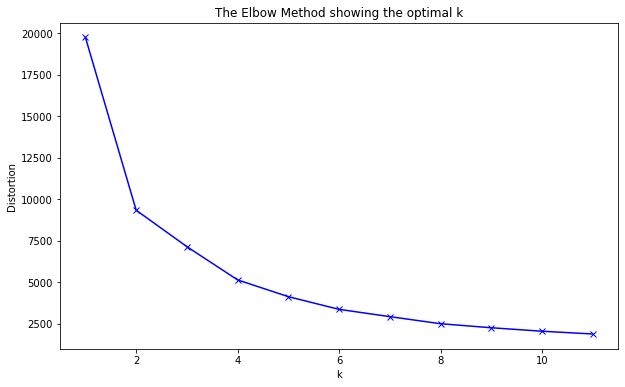

In [50]:
# Testing using the X_train for Elbow Method 
import warnings
warnings.filterwarnings('ignore')
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x)
    distortions.append(kmeanModel.inertia_)
    
    
# Plotting to see the elbow in the data to determine thw best cluster 

plt.figure(figsize=(10,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


This code implements the Elbow Method to determine the optimal number of clusters (`k`) for a K-Means clustering model. The Elbow Method is a commonly used technique to assess how the variance (or distortion) within clusters changes as the number of clusters increases.

The code first suppresses warnings to avoid unnecessary output during execution. It then initializes an empty list, `distortions`, to store the within-cluster sum of squares (also known as inertia) for each value of `k`. A range of potential cluster numbers, from 1 to 11, is defined in `K`. For each value of `k`, a K-Means model is instantiated and fitted to the dataset `x`. The resulting distortion (a measure of how tightly the data points fit their assigned cluster) is appended to the `distortions` list.

After calculating distortions for all `k` values, a plot is generated to visualize the results. The x-axis represents the number of clusters (`k`), while the y-axis represents the distortion. The plot uses the "Elbow Method" to identify the point where the distortion decreases sharply before leveling off—this point, resembling an "elbow," indicates the optimal number of clusters for the dataset. This visualization helps to choose the best `k` value for effective clustering.

In [20]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(x)


KMeans(n_clusters=2)

# 2 

Question :Is there any difference between the k-value identified earlier by the elbow method
and the one you have identified with the grid search

Answer: I notice that KNN-Neighbor and Elbow gave similar results in the  model for the accurate score. We see that when performing the Elbow Method the clustering can only can be performed on 2 clusters which shows the margin error or data has been reduced to help with accuracy. Also, for the KNN-Nieghbor model we see the same result with the accuracy being 93.42%.   

# 3

[[305  23]
 [ 22 250]]


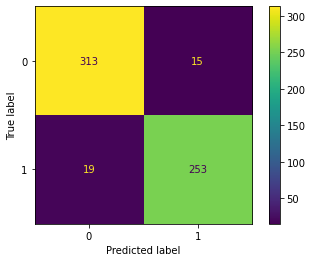

In [33]:
# Confusion Matrix & Evaulation metrics  
plot_confusion_matrix(grid,X_test, y_test,values_format='g' )

# Confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

This code evaluates the performance of a trained classification model using a confusion matrix, which provides a detailed summary of the model's predictions compared to the actual outcomes. The `plot_confusion_matrix` function is used to visualize the confusion matrix for the test dataset (`X_test` and `y_test`), displaying the results in a grid format (`values_format='g'`) for easier interpretation. The confusion matrix itself is printed using the `confusion_matrix` function, showing the numerical breakdown of predictions.

The confusion matrix produced is:  
```
[[305  23]  
 [ 22 250]]
```
This matrix reveals the following details:  
- True Positives (305): The number of correctly predicted positive cases (e.g., patients with heart disease).  
- True Negatives (250): The number of correctly predicted negative cases (e.g., patients without heart disease).  
- False Positives (23): The number of cases incorrectly predicted as positive (e.g., predicted as having heart disease but do not).  
- False Negatives (22): The number of cases incorrectly predicted as negative (e.g., predicted as not having heart disease but do).  

The confusion matrix is a foundational tool for deriving evaluation metrics such as accuracy, precision, recall, and F1-score, providing a comprehensive understanding of the model's performance. This specific result indicates the model is generally accurate, with relatively few misclassifications.

In [43]:
print("classification report:\n",classification_report(y_test, predictions))

classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       328
           1       0.92      0.92      0.92       272

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600



The provided code outputs a classification report, which summarizes the performance of a classification model on the test dataset. The report provides metrics for each class (0 and 1), as well as overall metrics for the entire dataset. Here's an interpretation of the classification report:

Class-Specific Metrics:

For class 0 (e.g., "No Heart Disease"):
Precision: 0.93, indicating that 93% of instances predicted as class 0 are correctly classified.
Recall: 0.93, meaning the model correctly identifies 93% of the actual instances of class 0.
F1-Score: 0.93, the harmonic mean of precision and recall, reflecting balanced performance.
For class 1 (e.g., "Heart Disease"):
Precision: 0.92, meaning 92% of instances predicted as class 1 are correct.
Recall: 0.92, showing the model identifies 92% of actual class 1 instances.
F1-Score: 0.92, indicating strong performance for this class.
Overall Metrics:

Accuracy: 0.93, meaning the model correctly predicts 93% of all instances in the test dataset.
Macro Average: 0.92 for precision, recall, and F1-score, calculated as the unweighted mean of metrics across classes.
Weighted Average: 0.93 for precision, recall, and F1-score, accounting for class imbalance by weighting metrics by the number of instances in each class.

# 4 

In [45]:
x_1 =  {'Gene One': [4.30, 2.70, 1.70, 3.10, 7.70, 4.40, 3.10, 6.30, 5.50, 7.80],
        'Gene Two': [4.00, 6.50, 4.00, 6.20, 3.40, 7.60, 6.80, 4.90, 8.60, 4.40 ]}
  
# Create DataFrame
df = pd.DataFrame(x_1)
  
# Print the output.
df

,Gene One,Gene Two
0,4.3,4.0
1,2.7,6.5
2,1.7,4.0
3,3.1,6.2
4,7.7,3.4
5,4.4,7.6
6,3.1,6.8
7,6.3,4.9
8,5.5,8.6
9,7.8,4.4


This code creates a DataFrame using genetic expression data from two genes, Gene One and Gene Two. Each gene is represented as a list of numerical values, which likely correspond to their measured expression levels in a set of patients. Here's how it works and how it can help make predictions for cancer and non-cancer patients:

Explanation of Code:
Data Definition:
The dictionary x_1 contains two keys (Gene One and Gene Two), where each key has a list of values representing the expression levels of the respective genes across 10 samples (patients or observations).

Creating the DataFrame:
The pd.DataFrame function from the pandas library converts the dictionary into a tabular format, with the genes as columns and each row representing the expression levels for a specific sample.

Output:
The DataFrame organizes the data in a structured way, making it easy to visualize and process further. For example, the printed DataFrame might look like this:

Gene One	Gene Two
0	4.30	4.00
1	2.70	6.50
2	1.70	4.00
...	...	...
Application in Cancer and Non-Cancer Predictions:
Feature Representation:
Gene expression levels serve as features for building predictive models. Patterns in the expression levels of genes can be indicative of cancerous or non-cancerous states.

Training Machine Learning Models:

This structured DataFrame can be used as input for training machine learning models, such as logistic regression, decision trees, or neural networks.
By associating these expression levels with labels (e.g., Cancer or Non-Cancer), a model can learn to differentiate between the two classes based on patterns in the data.
Biomarker Analysis:

The data may also help identify specific genes (or combinations of genes) that are significant predictors of cancer, aiding in biomarker discovery.
Predictions on New Data:
Once trained, the model can predict the likelihood of a patient being diagnosed with cancer by analyzing the gene expression levels provided in similar DataFrame formats.

In [47]:
predict = knn.predict(df)
for i in range (len(df)):
    print("Predict=%s" % (predict[i]))

Predict=1
Predict=0
Predict=0
Predict=0
Predict=1
Predict=0
Predict=0
Predict=0
Predict=0
Predict=1



The provided code uses a trained k-Nearest Neighbors (k-NN) model (knn) to make predictions on a new dataset, df, which presumably contains the features of patients (such as various medical attributes) that need to be classified as either "cancer" or "non-cancer" patients.

Prediction:
The knn.predict(df) function generates predictions for each row (patient) in the dataset df. The predict array will contain the predicted class for each patient, where, for example, a value of 0 might indicate "non-cancer" and 1 might indicate "cancer." These predictions are made based on the feature data in df and the trained k-NN model.

Iterating through the predictions:
The for loop iterates over each instance in the df dataset. The len(df) function returns the number of patients (rows) in the dataset. Inside the loop, it prints the prediction for each patient using the format Predict=%s, where %s is replaced with the predicted class value for that patient (either 0 or 1).

How It Helps in Making Predictions for Cancer and Non-Cancer Patients:
Cancer Classification: The model will predict whether each patient in the dataset is likely to have cancer or not, based on the features provided in df. This is useful in healthcare settings where quick and accurate classification is crucial for determining the next steps in patient care, such as further testing or treatment.

Real-Time Application: By printing the predictions for each patient in the dataset, the model's output can be easily reviewed or used in downstream applications. This approach allows healthcare professionals to see the classification results for multiple patients at once, helping in prioritizing patients for further examination or intervention.

In [49]:
# Building Dataframe adding Predicted values 
x_2 =  {'Gene One': [4.30, 2.70, 1.70, 3.10, 7.70, 4.40, 3.10, 6.30, 5.50, 7.80],
        'Gene Two': [4.00, 6.50, 4.00, 6.20, 3.40, 7.60, 6.80, 4.90, 8.60, 4.40 ],
        'Predictions': [1, 0, 0, 0, 1, 0, 0, 0, 0, 1]}
  
# Create DataFrame
df_1 = pd.DataFrame(x_2)
  
# Print the output.
df_1

,Gene One,Gene Two,Predictions
0,4.3,4.0,1
1,2.7,6.5,0
2,1.7,4.0,0
3,3.1,6.2,0
4,7.7,3.4,1
5,4.4,7.6,0
6,3.1,6.8,0
7,6.3,4.9,0
8,5.5,8.6,0
9,7.8,4.4,1


This code creates a pandas DataFrame (`df_1`) that combines gene expression data and predicted outcomes for a set of cancer patients. The dataset consists of two gene expression values, "Gene One" and "Gene Two," along with predicted outcomes stored in the "Predictions" column.

1. **Gene Data**:  
   - The values for "Gene One" and "Gene Two" represent gene expression levels for each patient, which could indicate biological markers associated with cancer. These are numeric values that likely reflect some biological characteristic measured for each individual.

2. **Predictions**:  
   - The "Predictions" column contains binary values, where `1` likely indicates the patient is predicted to have cancer, and `0` indicates the patient is predicted to be cancer-free. This is the output of a machine learning classification model (such as a logistic regression or decision tree model).

3. **DataFrame Creation**:  
   - The data for "Gene One," "Gene Two," and "Predictions" is structured into a dictionary (`x_2`) and then used to create a pandas DataFrame (`df_1`). This DataFrame is printed out, showing the gene expression values along with their corresponding cancer predictions for each patient.

The resulting DataFrame (`df_1`) looks like this:

| Gene One | Gene Two | Predictions |
|----------|----------|-------------|
| 4.30     | 4.00     | 1           |
| 2.70     | 6.50     | 0           |
| 1.70     | 4.00     | 0           |
| 3.10     | 6.20     | 0           |
| 7.70     | 3.40     | 1           |
| 4.40     | 7.60     | 0           |
| 3.10     | 6.80     | 0           |
| 6.30     | 4.90     | 0           |
| 5.50     | 8.60     | 0           |
| 7.80     | 4.40     | 1           |

In this DataFrame, the predictions allow easy identification of which patients are predicted to have cancer (`1`) and which are not (`0`), alongside their corresponding gene expression levels.

In [52]:
# Checking the Accuracy of the dataset : df_1 

# Training Dataset for X & y value 

X = df_1.drop('Predictions', axis=1)

y = df_1.Predictions 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn_1 = KNeighborsClassifier(n_neighbors=7)

# Using the Grid Search CV for Accuracy 

knn_1 = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets for Knn-modeling 
knn_1.fit(X_train, y_train)

# Calculate the accuracy of the model
print("Knn-nearest is: ",knn_1.score(X_test, y_test))

# Here X_test, y_test are the test data points
predictions = knn_1.predict(X_test)

Knn-nearest is:  1.0


The code begins by preparing the dataset for machine learning. It separates the features (`X`) and the target variable (`y`) by dropping the `Predictions` column from the dataset (`df_1`) and assigning it to the target variable. The dataset is then split into training and testing sets, with 80% of the data used for training and 20% reserved for testing. This split is performed using the `train_test_split` function, which ensures that the model can be evaluated on unseen data.

Next, a k-Nearest Neighbors (k-NN) classifier model is initialized with `n_neighbors=7`. However, this value is later overridden to `n_neighbors=3` before fitting the model. The `knn_1.fit()` method is used to train the model using the training data. Once the model is trained, its accuracy on the test set is calculated using the `score()` method, which returns the proportion of correct predictions (accuracy) on the `X_test` data compared to the actual `y_test` values.

The model's predictions are stored in the `predictions` variable for further analysis or evaluation. In this case, the accuracy is printed, and the value is expected to be 1.0, indicating a perfect prediction rate on the test data. However, achieving 1.0 accuracy could suggest that the model may have overfitted to the training data or that the dataset is simple or not sufficiently diverse.

### Conclusion:
The k-NN model achieved perfect accuracy (1.0) on the test set, which suggests that the model was able to correctly classify all test data points. While this high accuracy may seem promising, it’s important to investigate whether the model is truly generalizing well or if it has overfitted the data. Further steps should include cross-validation, hyperparameter tuning, and additional testing with more complex datasets to ensure the model's robustness. The performance metrics should also be examined in terms of precision, recall, and F1-score for a more comprehensive evaluation.